In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"mohammeddilnavaz","key":"99ce96b4150a25d4c7e45273b67742d8"}'}

In [ ]:
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s food



ref                                                 title                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------  ---------------------------------  -----------  --------------------------  -------------  ---------  ---------------  
kmader/food41                                       Food Images (Food-101)              5693808106  2018-05-15 07:40:37.080000          53616        713  0.8125           
borapajo/food-choices                               Food choices                           5505217  2017-04-23 14:04:43.720000          62670        557  0.85294116       
nehaprabhavalkar/indian-food-101                    Indian Food 101                           6951  2020-09-30 06:23:43.063000          36384        607  1.0              
sudarshan24byte/online-food-dataset                 Online Food Dataset                       3453  2024-03-02 18:50:30.310000          5040

In [ ]:
!kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset


Dataset URL: https://www.kaggle.com/datasets/iamsouravbanerjee/indian-food-images-dataset
License(s): other
indian-food-images-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls


fruit-and-vegetable-image-recognition.zip  sample_data
indian-food-images-dataset.zip


In [ ]:
!rm fruit-and-vegetable-image-recognition.zip


In [ ]:
!ls

indian-food-images-dataset.zip	sample_data


In [ ]:
!unzip indian-food-images-dataset.zip -d /content/data


Archive:  indian-food-images-dataset.zip
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/02d09e872d.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/02f2e49039.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/06c639bab2.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/08b8f8efc1.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/09a37d7cc7.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/0cd70ffc10.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/0d09b0e580.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/0e84c2b7fd.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/10f608ecc4.jpg  
  inflating: /content/data/Indian Food Images/Indian Food Images/adhirasam/12b1eb8026.jpg  
  inflating: /content/data/Indian Food 

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
base_dir = '/content/data/Indian Food Images'


In [ ]:
import os
categories = os.listdir(base_dir)
print("Total food categories:", len(categories))
print("Example categories:", categories[:10])


Total food categories: 1
Example categories: ['Indian Food Images']


In [ ]:
!ls "/content/data/Indian Food Images"


'Indian Food Images'


In [ ]:
base_dir = '/content/data/Indian Food Images/Indian Food Images'


In [ ]:
import os
categories = os.listdir(base_dir)
print("Total food categories:", len(categories))
print("Example categories:", categories[:10])


Total food categories: 80
Example categories: ['kachori', 'misti_doi', 'cham_cham', 'aloo_methi', 'gajar_ka_halwa', 'double_ka_meetha', 'chak_hao_kheer', 'naan', 'chicken_tikka', 'daal_puri']


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters
img_height, img_width = 224, 224
batch_size = 32

# Create training and validation data generators
datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values
    validation_split=0.2,     # 80% train, 20% validation
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 3200 images belonging to 80 classes.
Found 800 images belonging to 80 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load the pretrained MobileNetV2 model without the top layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers so they don’t train initially
base_model.trainable = False

# Build the model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(80, activation='softmax')  # 80 classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 80)             │       102,480 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,360,464 (9.00 MB)

 Trainable params: 102,480 (400.31 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,   # you can increase to 20 for better results
    verbose=1
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.0112 - loss: 4.8914 - val_accuracy: 0.0312 - val_loss: 4.3323
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.0364 - loss: 4.3878 - val_accuracy: 0.0662 - val_loss: 3.9945
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.0723 - loss: 4.0242 - val_accuracy: 0.1213 - val_loss: 3.7228
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.1063 - loss: 3.7363 - val_accuracy: 0.1850 - val_loss: 3.5064
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.1529 - loss: 3.4931 - val_accuracy: 0.2175 - val_loss: 3.3130
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.2047 - loss: 3.2628 - val_accuracy: 0.2562 - val_loss: 3.1532
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.2581 - loss: 3.0789 - val_accuracy: 0.2850 - val_loss: 3.0003
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.2738 - loss: 2.9393 - val_accu

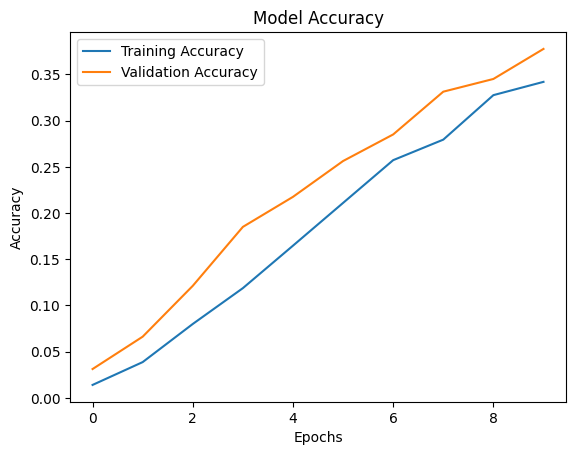

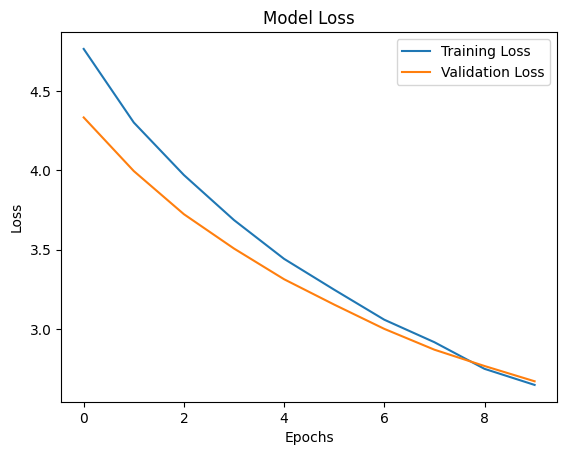

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
model.save('sustainable_food_model.h5')


from google.colab import files
files.download('sustainable_food_model.h5')


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload your test image
from google.colab import files
uploaded = files.upload()

# Predict
for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    class_name = categories[predicted_class]
    print(f"Predicted Food Item: {class_name}")


Saving Hyderabadi-Biryani--1024x538.jpg to Hyderabadi-Biryani--1024x538.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted Food Item: kadhi_pakoda


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,   # was 10
    verbose=1
)


Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.3625 - loss: 2.5679 - val_accuracy: 0.3887 - val_loss: 2.5977
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.4039 - loss: 2.4070 - val_accuracy: 0.3988 - val_loss: 2.5145
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.4106 - loss: 2.3601 - val_accuracy: 0.4038 - val_loss: 2.4562
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4453 - loss: 2.2504 - val_accuracy: 0.4137 - val_loss: 2.3912
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 194s 2s/step - accuracy: 0.4633 - loss: 2.1894 - val_accuracy: 0.4363 - val_loss: 2.3196
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.4739 - loss: 2.0747 - val_accuracy: 0.4425 - val_loss: 2.2826
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 195s 2s/step - accuracy: 0.4899 - loss: 2.0419 - val_accuracy: 0.4400 - val_loss: 2.2628
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5286 - loss: 1.9393 - val_accu

In [ ]:
base_model.trainable = True

# Optionally, freeze only first few layers
for layer in base_model.layers[:100]:
    layer.trainable = False

# Recompile with a smaller learning rate
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rotation_range=25,
    horizontal_flip=True
)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
print('Classification Report')
print(classification_report(val_generator.classes, y_pred, target_names=list(val_generator.class_indices.keys())))


25/25 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step
Classification Report
                              precision    recall  f1-score   support

                   adhirasam       0.00      0.00      0.00        10
                   aloo_gobi       0.00      0.00      0.00        10
                  aloo_matar       0.00      0.00      0.00        10
                  aloo_methi       0.00      0.00      0.00        10
           aloo_shimla_mirch       0.00      0.00      0.00        10
                  aloo_tikki       0.00      0.00      0.00        10
                      anarsa       0.00      0.00      0.00        10
                     ariselu       0.00      0.00      0.00        10
                bandar_laddu       0.00      0.00      0.00        10
                     basundi       0.00      0.00      0.00        10
                     bhatura       0.00      0.00      0.00        10
               bhindi_masala       0.00      0.00      0.00        10
                     biryani

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Upload your test image
from google.colab import files
uploaded = files.upload()

# Predict
for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions[0])
    class_name = categories[predicted_class]
    print(f"Predicted Food Item: {class_name}")


Saving IMG_1117.PNG to IMG_1117.PNG
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
Predicted Food Item: kalakand


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("trolukovich/food11-image-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'food11-image-dataset' dataset.
Path to dataset files: /kaggle/input/food11-image-dataset
